# Анализ продуктовых метрик обучающего приложения

**Цель исследования:**
* Провести анализ продуктовых метрик приложения и дать рекомендации какие метрики следует отслеживать в дальнейшем.

**План исследования:**
1. Введение.
2. Откроем файлы с данными и изучим общую информацию;
3. Предобработка данных
    * При необходимоти заменим наименования столбцов;
    * Изменим типы данных в столбцах на нужные;
    * Рассмотрим пропуски и решим что с ними делать;
    * Найдем и удалим, при необходимости, явные дубликаты;
4. Исследовательский анализ данных:
    * Посмотрим за какой период собраны данные;
    * Посмотрим сколько всего пользователей в данных;
    * Посмотрим сколько всего уровней;
    * Какое количество пользователей дошло до последнего уровня;
5. Проанализируем продуктовые метрики:
    * Retention и время, которое ученики проводят в приложении;
    * Как ученики переходят с уровня на уровень;
    * Метрики монетизации для всей когорты;
    * Посмотрим где ученики совершают больше всего платежей;
    * Посмотрим где ученики совершают первые платежи.
6. Общий вывод.

## Введение

Вспоним определение ARPPU.

* ARPPU (англ. Average revenue per paying user, средняя выручка на одного платящего пользователя) — показатель, используемый в основном в приложениях и играх с бесплатной или условно-бесплатной схемой монетизации, показывающий лояльность аудитории к ценам, установленным в проекте. Имеется смежная метрика ARPU - это средняя выручка на одного пользователся (вне зависимости от того платящий клиент или нет), по ней можно оценить полную окупаемость приложения/игры и т.п.

* ARPPU = Gross/PU

        где:

        PU — общее количество уникальных пользователей, заплативших за контент в приложении в течение какого-то периода.

        Gross - общая сумма платежей за этот же период

* Если ARPPU снизился, это говорит о том, что пользователи стали меньше тратить в приложении/игре и т.п. Следовательно снизился общий доход и в меньшую сторону изменилась окупаемость пользователей. Это плохо.

Если предположить, что в результате обновления дизайна продукта мы наблюдаем
увеличение среднего времени нахождения пользователей в приложении, но
уровень конверсии в покупку снизился то:

Необходимо уточнить что именно изменилось в результате обновления дизайна, посмотрю как пользователь переходит по воронке продаж. Возможно из-за обновления дизайна появилась техническая ошибка не позволяющая пользователю совершить покупку, либо увеличивающая время до покупки и пользователь успевает "передумать". Команде продукта порекомендую проверить есть ли ошибки при оплате, и, если это возможно, добавить кномку быстрой оплаты(быстрой покупки) без перехода по всем этапам воронки. Так же необходимо проанализировать рекламные расходы(САС), LTV и ROI.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from datetime import datetime, timedelta
import plotly.io as pio
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.scale = 1.2

### Откроем файлы с данными и изучим общую информацию

In [2]:
users = pd.read_csv('C:\\StudentYandex\\Projekts\\Test_Productovaya_Analitica\\users.csv')

In [3]:
sessions = pd.read_csv('C:\\StudentYandex\\Projekts\\Test_Productovaya_Analitica\\sessions.csv')

In [4]:
payments = pd.read_csv('C:\\StudentYandex\\Projekts\\Test_Productovaya_Analitica\\payments.csv')

In [5]:
levels = pd.read_csv('C:\\StudentYandex\\Projekts\\Test_Productovaya_Analitica\\levels.csv')

In [6]:
users.head()

,Unnamed: 0,user_id,reg_time
0,0,439127,2023-05-16 15:47:56.024
1,1,646681,2023-05-16 16:32:35.495
2,2,35136,2023-05-16 16:50:14.571
3,3,933255,2023-05-16 03:28:56.790
4,4,59440,2023-05-16 06:53:22.412


In [7]:
sessions.head()

,Unnamed: 0,user_id,close_time,open_time
0,0,875013,2023-05-16 05:17:59,2023-05-16 05:06:09
1,1,138278,2023-05-16 06:48:24,2023-05-16 06:47:34
2,2,138278,2023-05-18 01:44:40,2023-05-18 01:07:58
3,3,138278,2023-05-18 05:02:58,2023-05-18 04:51:06
4,4,138278,2023-05-19 05:58:32,2023-05-19 05:46:19


In [8]:
payments.head()

,Unnamed: 0,user_id,pay_time,amt
0,1,107907,2023-05-29 17:08:18.890,0.400218
1,2,510991,2023-05-20 16:55:01.216,0.199608
2,3,294837,2023-05-19 01:41:55.970,0.199608
3,4,644287,2023-05-20 03:01:53.697,0.199608
4,5,673424,2023-05-20 03:33:36.918,0.099302


In [9]:
levels.head()

,Unnamed: 0,user_id,time,level
0,0,105194,2023-05-16 08:22:12.799003,2.0
1,1,105194,2023-05-16 08:26:42.405003,3.0
2,2,105194,2023-05-16 08:27:12.760003,4.0
3,3,991914,2023-05-16 09:06:38.315003,2.0
4,4,991914,2023-05-16 09:09:39.832003,3.0


**Вывод:**

Описание данных:

Таблица `users` содержит информацию о пользователях:
* `user_id` - id пользователя;
* `reg_time` - время события.

Таблица `sessions` содержит информацию о сессиях пользователей:
* `user_id` - id пользователя;
* `open_time` - время начала сессии;
* `close_time` - время окончания сессии.

Таблица payments содержит информацию о платежах пользователей:
* `user_id` - id пользователя;
* `time` - время события;
* `amt` - сумма платежа.

Таблица `levels` содержит информацию о прохождении пользователей по уровням:
* `user_id` - id пользователя;
* `time` - время события;
* `level` - номер полученного игроком уровня

Во всех таблицах имеется лишний столбец `Unnamed: 0` - задублированный индекс, избавимся от него на этапе предобработки.

### Предобработка данных

**Напишем функцию для проверки данных в таблице:**

In [10]:
# напишем функцию для проверки наличия дубликатов и пропусков
def processing (df):
    count_dupl = df.duplicated().sum() # Проверяем количество явных дубликатов
    count_isna = df.isna().sum() # Проверяем количество пропусков в каждом столбце
    info = df.info() # выводим общую информацию о таблице
    return print('Количество дубликатов:',count_dupl, sep = '\n'),\
           print('Количество пропусков в каждом столбце:', count_isna, sep = '\n')

**Рассмотрим таблицу `users`:**

In [11]:
processing(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31114 entries, 0 to 31113
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31114 non-null  int64 
 1   user_id     31114 non-null  int64 
 2   reg_time    31114 non-null  object
dtypes: int64(2), object(1)
memory usage: 729.4+ KB
Количество дубликатов:
0
Количество пропусков в каждом столбце:
Unnamed: 0    0
user_id       0
reg_time      0
dtype: int64


(None, None)

* Пропуски и дубликаты в таблице `users` отсутствуют, но тип данных в столбце `reg_time` не соответствует ожидаемому. Поменяем тип данных в данном столбце, а так же удалим дублирующий индексы столбец

In [12]:
users = users.drop(columns = 'Unnamed: 0')

In [13]:
users['reg_time'] = users['reg_time'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

* Добавим столбец `date` в таблицу `users`

In [14]:
users['date'] = users['reg_time'].map(lambda x: x.date())

**Рассмотрим таблицу `sessions`:**

In [15]:
processing(sessions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358004 entries, 0 to 358003
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  358004 non-null  int64 
 1   user_id     358004 non-null  int64 
 2   close_time  358004 non-null  object
 3   open_time   358004 non-null  object
dtypes: int64(2), object(2)
memory usage: 10.9+ MB
Количество дубликатов:
0
Количество пропусков в каждом столбце:
Unnamed: 0    0
user_id       0
close_time    0
open_time     0
dtype: int64


(None, None)

* Пропуски и дубликаты в таблице `sessions` отсутствуют, но тип данных в столбцах `close_time` и `open_time` не соответствует ожидаемому. Поменяем тип данных в данном столбце, а так же удалим дублирующий индексы столбец:

In [16]:
sessions = sessions.drop(columns = 'Unnamed: 0')

In [17]:
sessions['close_time'] = sessions['close_time'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [18]:
sessions['open_time'] = sessions['open_time'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

Добавим дополнительный столбец `session_time` в который запишем длительность каждой сессии:

In [19]:
sessions['session_time'] = sessions['close_time']-sessions['open_time']

**Рассмотрим таблицу `payments`:**

In [20]:
processing(payments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  699 non-null    int64  
 1   user_id     699 non-null    int64  
 2   pay_time    699 non-null    object 
 3   amt         699 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 22.0+ KB
Количество дубликатов:
0
Количество пропусков в каждом столбце:
Unnamed: 0    0
user_id       0
pay_time      0
amt           0
dtype: int64


(None, None)

* Пропуски и дубликаты в таблице `payments` отсутствуют, но тип данных в столбце `pay_time` не соответствует ожидаемому. Поменяем тип данных в данном столбце, а так же удалим дублирующий индексы столбец

In [21]:
payments = payments.drop(columns = 'Unnamed: 0')

In [22]:
payments['pay_time'] = payments['pay_time'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

**Рассмотрим таблицу `levels`:**

In [23]:
processing(levels)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130623 entries, 0 to 130622
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  130623 non-null  int64  
 1   user_id     130623 non-null  int64  
 2   time        130623 non-null  object 
 3   level       130623 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.0+ MB
Количество дубликатов:
0
Количество пропусков в каждом столбце:
Unnamed: 0    0
user_id       0
time          0
level         0
dtype: int64


(None, None)

* Пропуски и дубликаты в таблице `levels` отсутствуют, но тип данных в столбце `time` не соответствует ожидаемому. Поменяем тип данных в данном столбце, а так же удалим дублирующий индексы столбец

In [24]:
levels = levels.drop(columns = 'Unnamed: 0')

In [25]:
levels['time'] = levels['time'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

**Вывод:**

В результате предобработки выявлены и решены следующие проблемы:
* Пропуски и дубликаты в таблицах отсутствуют, что не может не радовать;
* Тип данных столбцов с датой и временем во всех талицах был некорректный - изменили на требуемый;
* Добавили столбец `date` в таблицу `users`;

### Исследовательский анализ данных

**Посмотрим за какой период собранны данные:**

In [26]:
print('Мы распологаем данными о зарезистрированных пользователях за период с', \
      users['reg_time'].min().date(), 'по', users['reg_time'].max().date())

Мы распологаем данными о зарезистрированных пользователях за период с 2023-05-11 по 2023-05-21


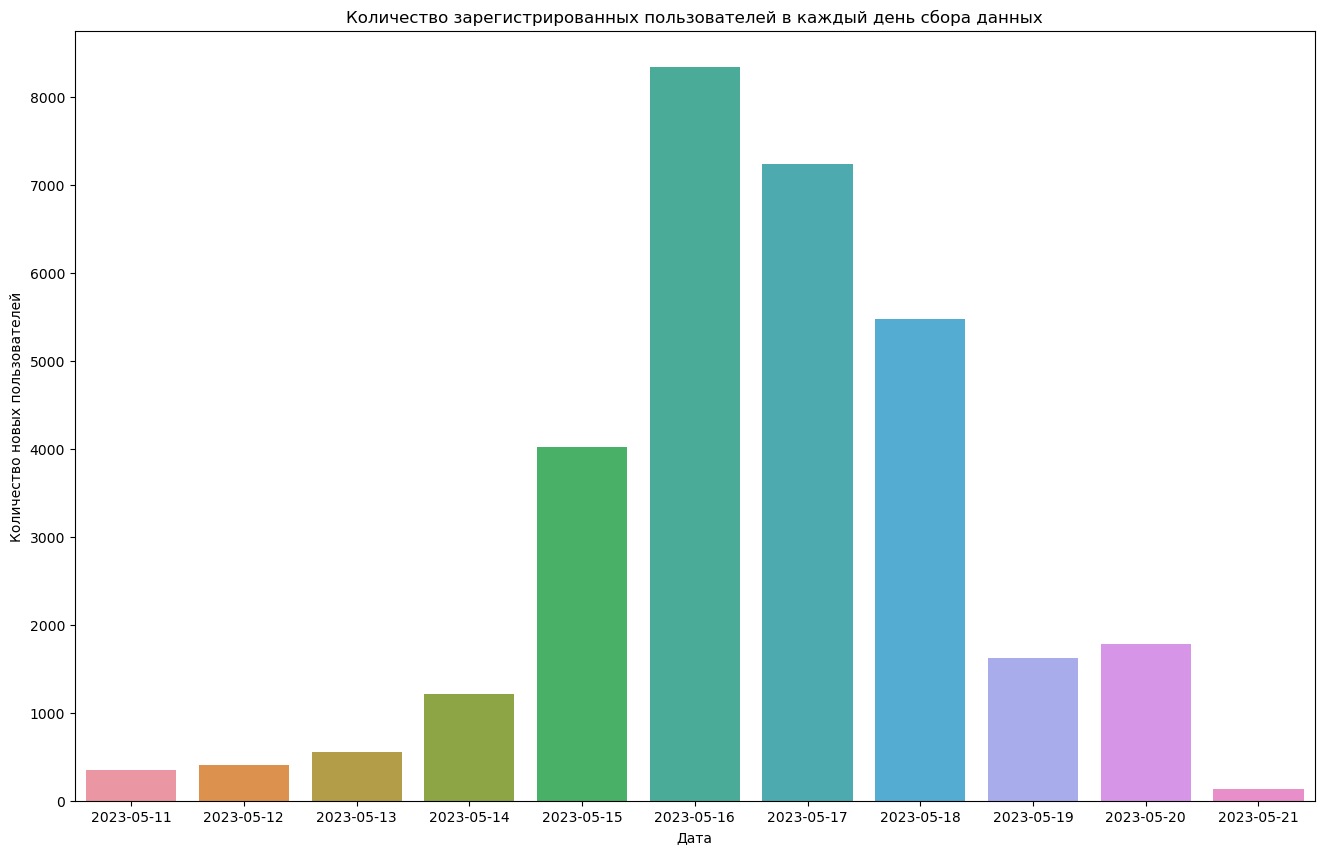

In [27]:
plt.figure(figsize=(16, 10))
# строим столбчатый график средствами seaborn
sns.countplot(x='date', data=users.sort_values(by='date'))
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Количество зарегистрированных пользователей в каждый день сбора данных')
plt.xlabel('Дата')
plt.ylabel('Количество новых пользователей')
# отображаем график на экране
plt.show()

* Количество новых пользователей росло с каждым днем до 16.05, потом пошло снижение с небольшим подъемом 20.05, возможно в эти дни проводились рекламмные акции/компании;

In [28]:
print('Мы распологаем данными о сессиях пользователей за период с', \
      sessions['open_time'].min().date(), 'по', sessions['close_time'].max().date())

Мы распологаем данными о сессиях пользователей за период с 2023-05-11 по 2023-05-30


In [29]:
print('Мы распологаем данными о покупках пользователей за период с', \
      payments['pay_time'].min().date(), 'по', payments['pay_time'].max().date())

Мы распологаем данными о покупках пользователей за период с 2023-05-12 по 2023-05-30


In [30]:
print('Мы распологаем данными о переходе пользователей с уровня на следующий за период с', \
      levels['time'].min().date(), 'по', levels['time'].max().date())

Мы распологаем данными о переходе пользователей с уровня на следующий за период с 2023-05-11 по 2023-05-30


**Посмотрим сколько всего пользователей в данных:**

In [31]:
total_users = users['user_id'].nunique()
print(f'Количество пользователей зарегитрировавшихся в приложении за предоставленный период: {total_users} человек.')

Количество пользователей зарегитрировавшихся в приложении за предоставленный период: 31114 человек.


**Посмотрим какой уровень максимальный:**

In [32]:
print('Максимальный уровень:', levels['level'].max())

Максимальный уровень: 21.0


In [33]:
users_levels = pd.concat([users, levels], ignore_index = True)
users_levels['level'] = users_levels['level'].fillna(1)
users_levels_grouped = users_levels.groupby('level').agg({'user_id':'nunique'}).reset_index()

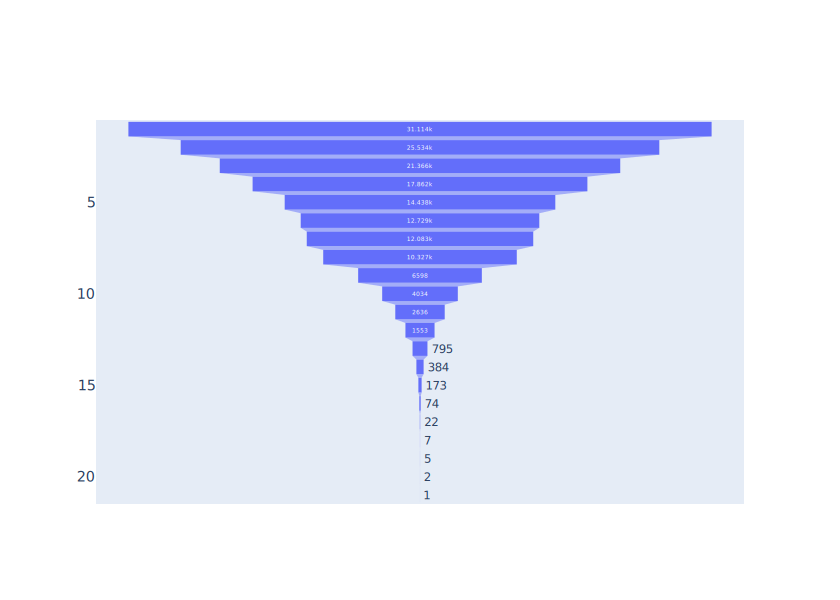

In [34]:
fig = go.Figure(go.Funnel(y=users_levels_grouped['level'], x=users_levels_grouped['user_id']))
fig.show()

* До 21 уровня добрался всего 1 пользователь из 31 114 человек, это не очень хорошо;

**Посчитаем сколько % пользователей теряется при переходе на каждый из уровней:**

In [35]:
users_levels_grouped['losses'] = users_levels_grouped['user_id']
for i in range(len(users_levels_grouped.index)):
    if i == 0:
        users_levels_grouped['losses'][i] = 0
    else:
        users_levels_grouped['losses'][i] = \
        round(100 - (users_levels_grouped['user_id'][i]/users_levels_grouped['user_id'][i-1])*100)

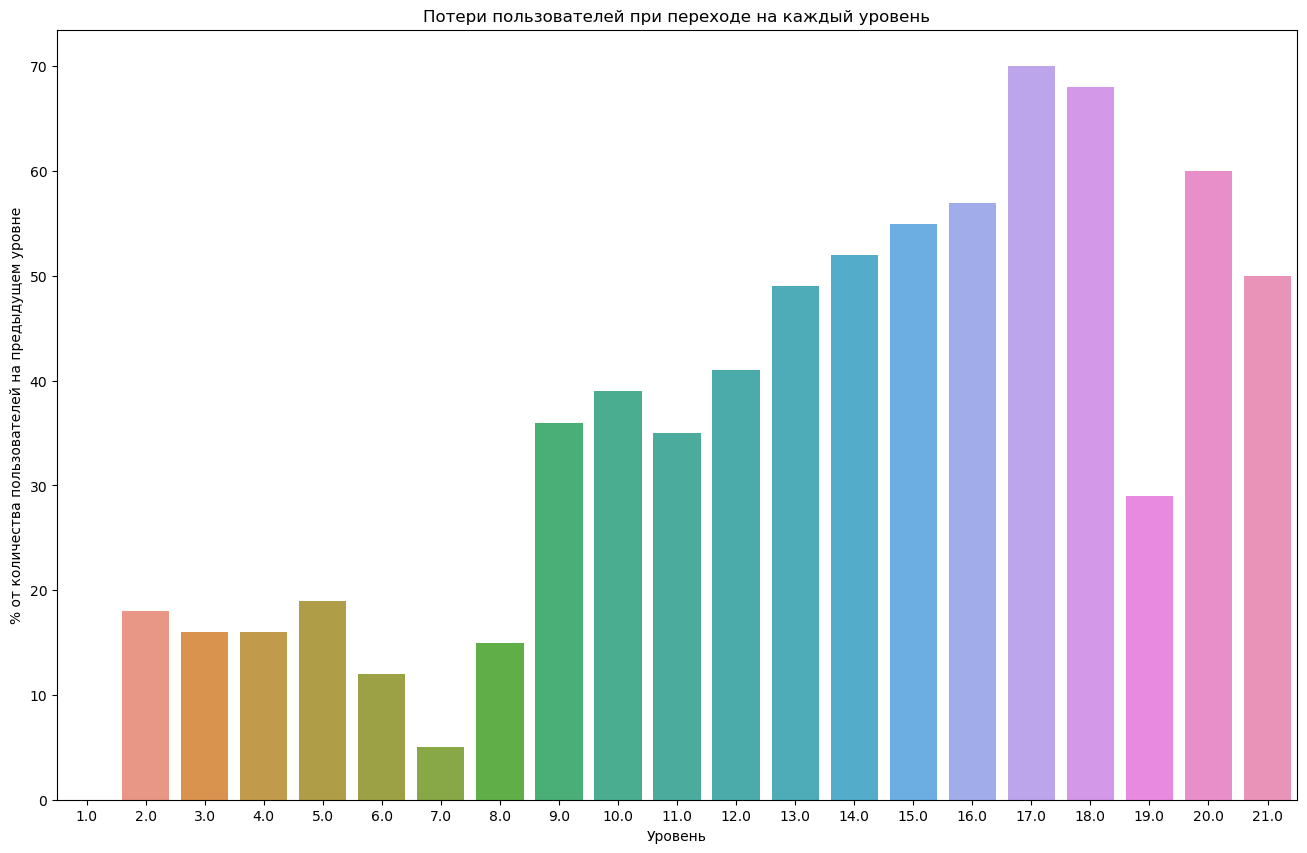

In [36]:
plt.figure(figsize=(16, 10))
sns.barplot(x='level',y='losses', data=users_levels_grouped)
plt.xlabel('Уровень')
plt.ylabel('% от количества пользователей на предыдущем уровне')
plt.title('Потери пользователей при переходе на каждый уровень')
plt.show()

* Самые большие потери пользователей при переходе с 16 на 17 уровень, а именно 70 %. Возможно на 16 уровне задания слишком сложные для аудитории, но это вопрос к разработчикам;

**Посмотрим сколько пользователей совершали покупки:**

In [37]:
payments['user_id'].nunique()

312

* Всего 312 пользователей совершают покупки, это чуть больше 1% от всех зарегистрированных;

**Посмотрим какую выручку принесло приложение за исследуемый период:**

In [38]:
print('Доход за исследуемый период:', round(payments['amt'].sum(),2), 'у.е.')

Доход за исследуемый период: 501.41 у.е.


**Посмотрим имеются ли выбросы в по сумме покупок и по сумме покупок каждого платящего пользователя**

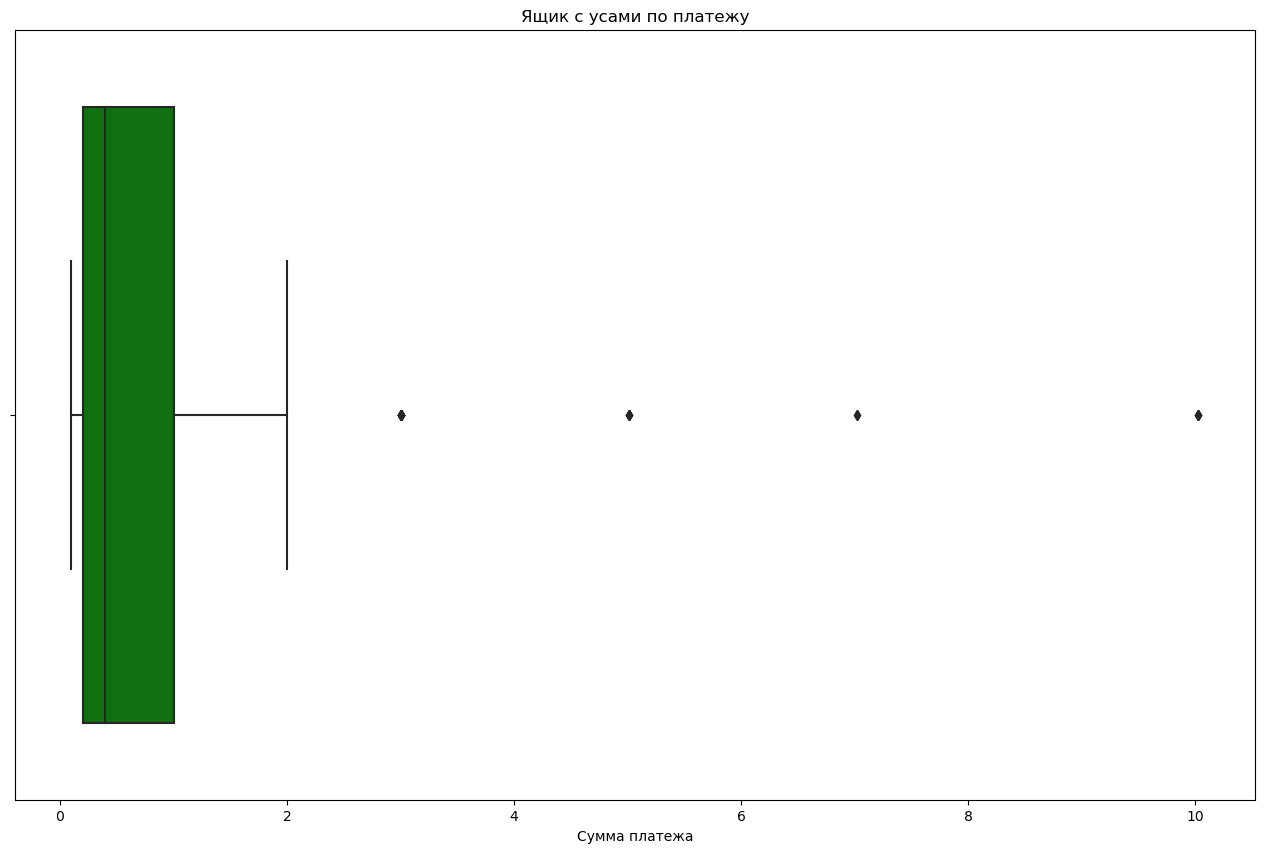

In [39]:
plt.figure(figsize=(16, 10))
sns.boxplot(data = payments, x = 'amt', color = 'green')
plt.title('Ящик с усами по платежу')
plt.xlabel('Сумма платежа')
plt.show()

* Имеются 4 выброса с платежами 3, 5, 7 и 10 у.е. Оставляем без изменений, нам интересны платящите пользователи;

**Посмотрим есть ли пользователи которые потратили больше других**

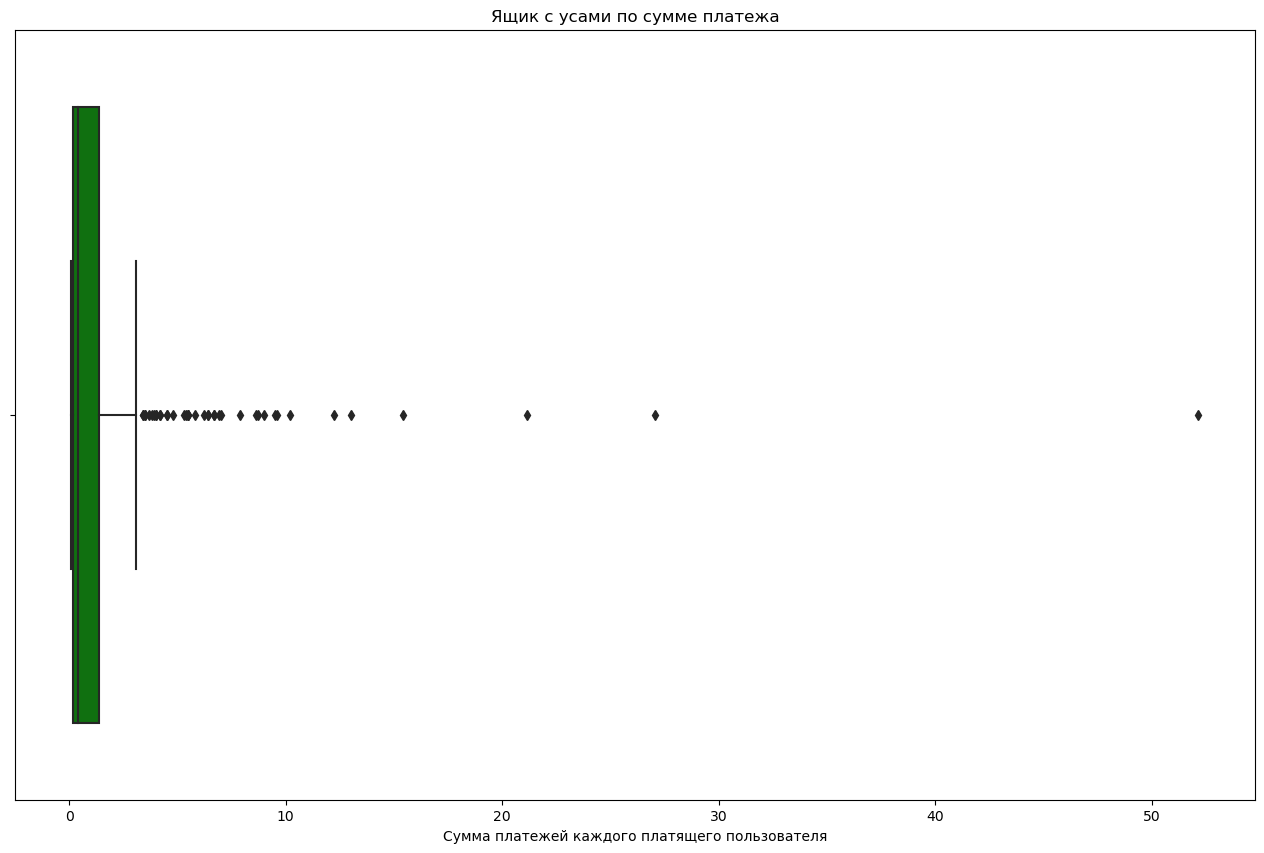

In [40]:
plt.figure(figsize=(16, 10))
sns.boxplot(data = payments.groupby('user_id').agg({'amt':'sum'}), x = 'amt', color = 'green')
plt.title('Ящик с усами по сумме платежа')
plt.xlabel('Сумма платежей каждого платящего пользователя')
plt.show()

* Основная масса платящих учеников тратит до ~ 3 у.е, но есть и те, кто тратит свыше 50 у.е.

Оставим этих пользователей в анализе, т.к. платящих и чуть больше 1 %;

**Вывод:**
* Мы распологаем данными о зарезистрированных пользователях за период с 2023-05-11 по 2023-05-21;
* Количество новых пользователей росло с каждым днем до 16.05, потом пошло снижение с небольшим подъемом 20.05, возможно в эти дни проводились рекламмные акции/компании;
* Мы распологаем данными о сессиях пользователей за период с 2023-05-11 по 2023-05-30;
* Мы распологаем данными о покупках пользователей за период с 2023-05-12 по 2023-05-30;
* Мы распологаем данными о переходе пользователей с уровня на следующий за период с 2023-05-11 по 2023-05-30;
* Количество пользователей зарегитрировавшихся в приложении за предоставленный период: 31114 человек;
* Максимальный уровень: 21;
* До 21 уровня добрался всего 1 пользователь из 31 114 человек, это не очень хорошо;
* Самые большие потери пользователей при переходе с 16 на 17 уровень, а именно 70 %. Возможно на 16 уровне задания слишком сложные для аудитории, но это вопрос к разработчикам;
* Всего 312 пользователей совершают покупки, это менее 1% от всех зарегистрированных;
* Сумма дохода за исследуемый период: 501.41 у.е.
* Имеются 4 выброса с платежами 3, 5, 7 и 10 у.е. Оставили без изменений, нам интересны платящите пользователи;
* Основная масса платящих учеников тратит до ~ 3 у.е, но есть и те, кто тратит свыше 50 у.е. Оставили этих пользователей в анализе, т.к. платящих и так чуть больше 1 %;

### Анализ продуктовых метрик

**Составим функции для создания профилей пользователей, расчета Retention Rate, и построения графиков Retention:**

In [41]:
# функция для создания пользовательских профилей

def get_profiles(sessions, payments):

    # находим параметры первых посещений
    profiles = (sessions.sort_values(by=['user_id', 'open_time']).groupby('user_id')
        .agg({'open_time': 'first'}).rename(columns={'open_time': 'first_ts'}).reset_index())
    # для когортного анализа определяем дату первого посещения
    profiles['dt'] = profiles['first_ts'].dt.date
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(payments['user_id'].unique())
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (profiles.groupby('dt').agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'}).reset_index())
    return profiles

In [42]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'open_time']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['open_time'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [43]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [44]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=1):

    # задаём размер сетки для графиков
    plt.figure(figsize=(16, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

* Момент анализа данных выбираем 31.05.2023, т.к. данные о сессиях, покупках и переходжах по уровням у нас до 30.05.2023 включительно;
* Горизонт выбираем 10 дней. Т.к. крайняя дата регистрации пользователей по нашим данным - 21.05.2023, следовательно включая 30.05.2023(крайняя сессия была в данную дату) у нас получается 10 полных лайфтаймов пользователей без пустых значений;

In [45]:
observation_date = datetime(2023, 5, 31).date()  # момент анализа
horizon_days = 10  # горизонт анализа

In [46]:
profiles = get_profiles(sessions, payments)
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days)

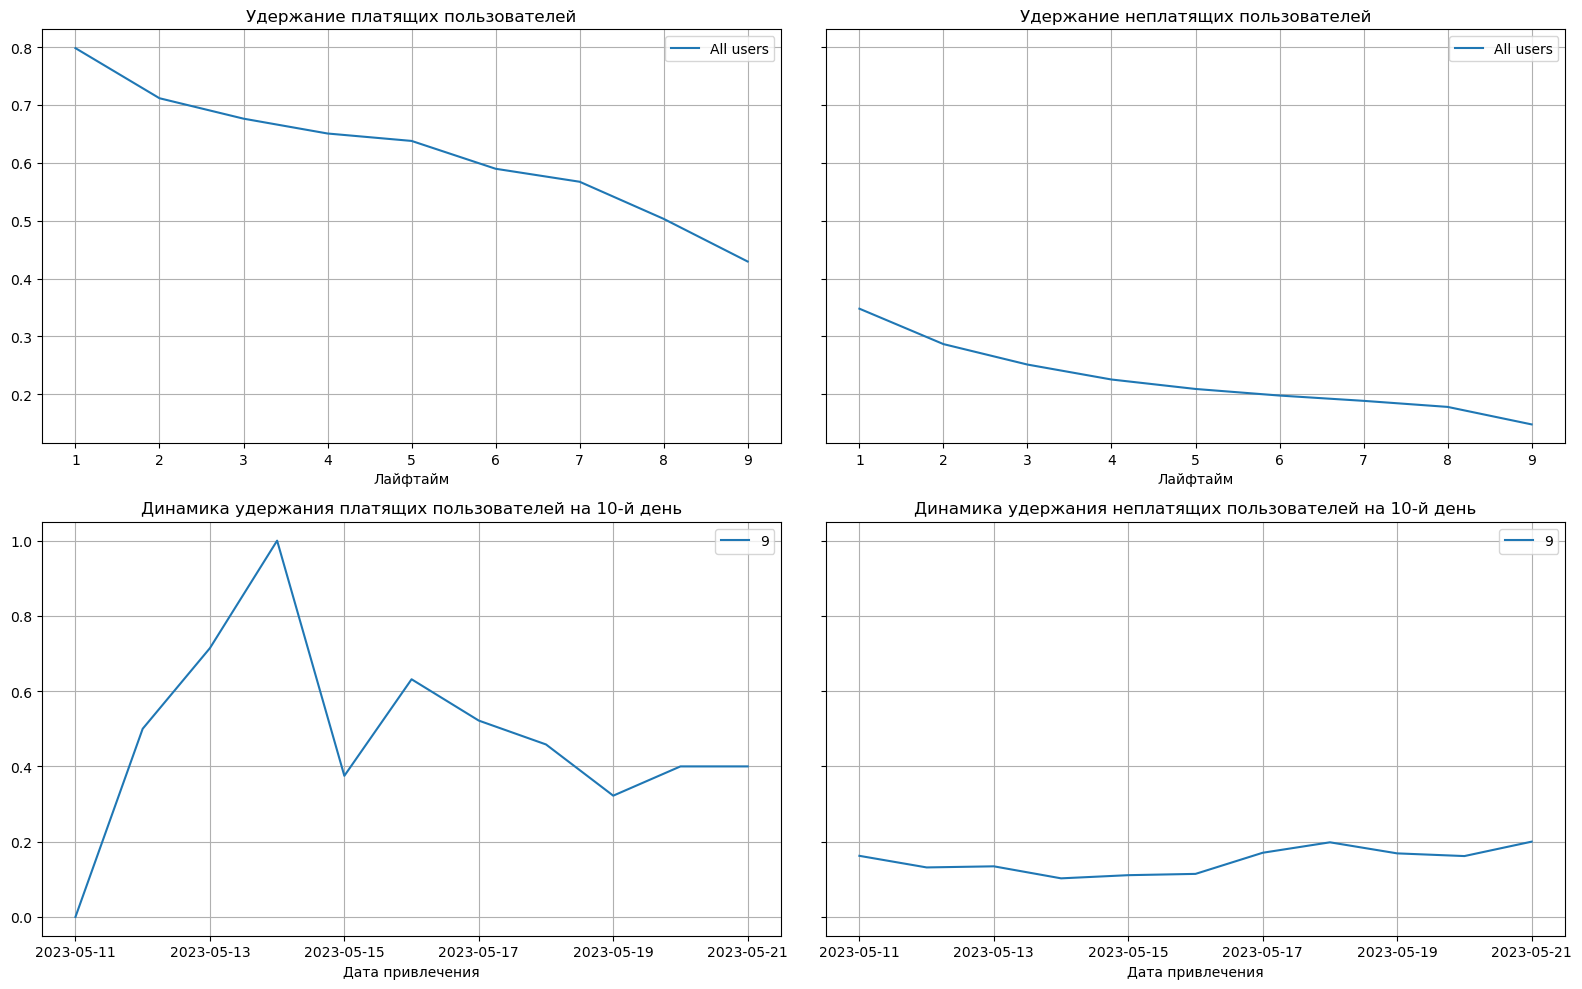

In [47]:
plot_retention(retention_grouped, retention_history, horizon_days)

* Удержание платящих пользователей лучше чем неплатящих, что не удивительно;
* 14.05.2023 по всей видимости проходила очень привлекательная промо акция для платящих пользоватлей, т.к. 100% (это подозрительно даже) пользователей привлеченных в данный день, пользовались приложением и на 10 лайфтайм, но платящих пользоватлей не так много, поэтому судить сложно;
* Динамиика удержания не платящих пользователей на 10-й день привлеченных с 14.05 постепенно растет, с небольшим падением 19.05 и 20.05, возможно акция направленная на привлечение пользователей так же повлияла на них;

**Посмотрим как ученики переходят с уровня на уровень.**

Для начала заполним пропуски в столбце `time` которые образовались после объединения таблиц `users` и `levels` чтобы расчитать время прохождения каждого уровня

In [48]:
for i in range(len(users_levels)):
    if pd.isnull(users_levels['time'][i]):
        users_levels['time'][i] = users_levels['reg_time'][i]
    else:
        pass

In [49]:
users_levels = users_levels[['user_id','time','level']]
users_levels = users_levels.sort_values(by=['user_id','level']).reset_index().drop(columns = 'index')
users_levels['passage_time'] = 0

Добавиляем столбец `passage_time` куда поместим время прохождения уровня:

In [50]:
for i in range(len(users_levels)):
    try:
        if users_levels['user_id'][i] == users_levels['user_id'][i+1]:
            users_levels['passage_time'][i] = users_levels['time'][i+1] - users_levels['time'][i]
        else:
            pass
    except:
        pass

In [51]:
users_levels = users_levels[users_levels['passage_time'] != 0]
users_levels['passage_time'] = users_levels['passage_time'].map(lambda x: pd.to_timedelta(x))

In [52]:
median_passage_time = users_levels.groupby('level').agg({'passage_time':'median'}).reset_index()

In [53]:
median_passage_time['passage_minutes'] = round((median_passage_time['passage_time'].apply(lambda x: x.total_seconds()))/60, 2)

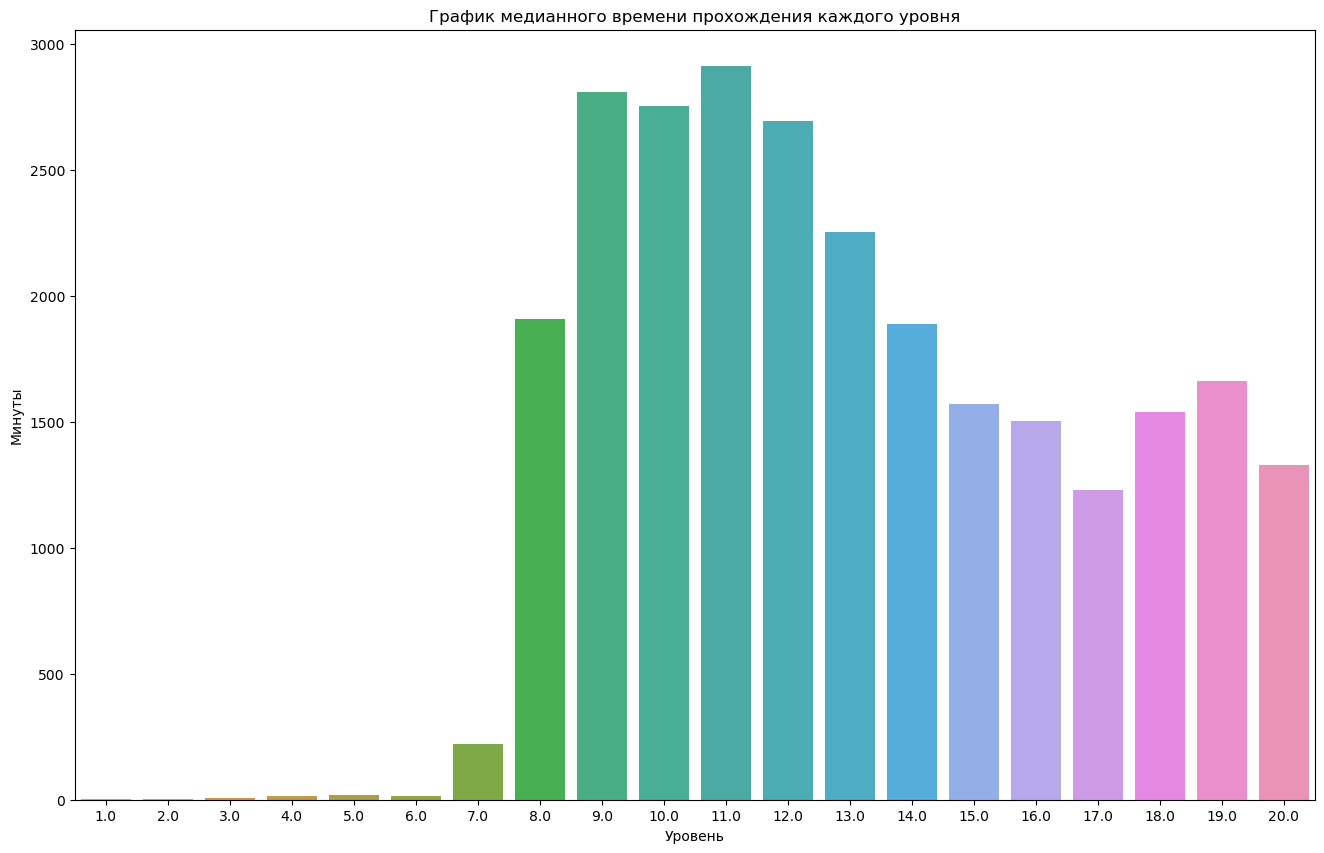

In [54]:
plt.figure(figsize=(16, 10)) # Строим диаграмму для наглядности
(sns.barplot(data = median_passage_time, y = 'passage_minutes', x= 'level')
    .set(title = 'График медианного времени прохождения каждого уровня', \
         xlabel = 'Уровень', ylabel = 'Минуты'))
plt.show()

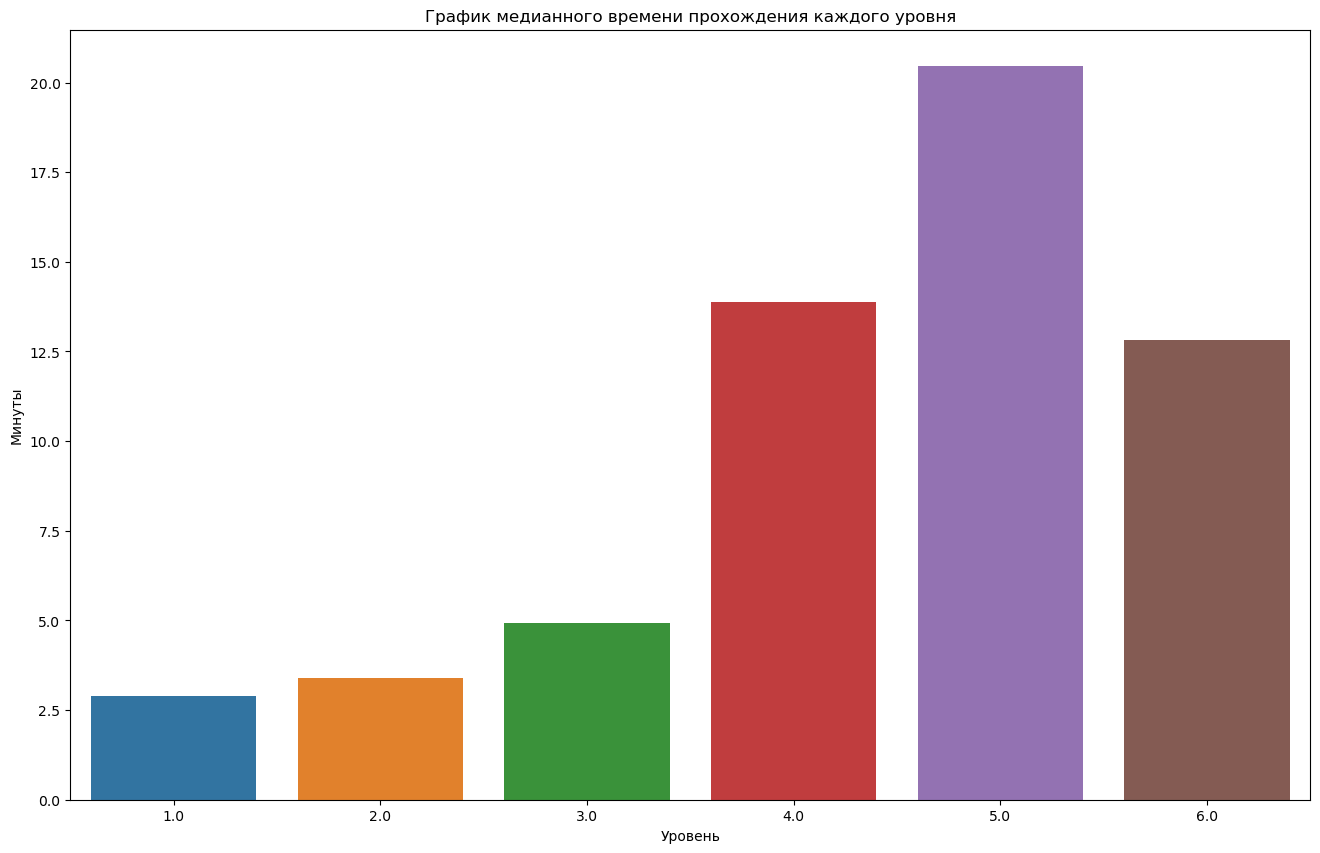

In [55]:
plt.figure(figsize=(16, 10)) # Строим диаграмму для наглядности
(sns.barplot(data = median_passage_time[median_passage_time['level']<7], y = 'passage_minutes', x= 'level')
    .set(title = 'График медианного времени прохождения каждого уровня', \
         xlabel = 'Уровень', ylabel = 'Минуты'))
plt.show()

* Самый длительный по медианному времени прохождения - 11 уровень, больше 2 дней;
* Всех быстрее проходят - 1 уровень, что не удивительно. Время прохождения до 3 минут;

**Рассмотрим метрики монетизации для всей когорты**

**Составим функции для расчета Конверсии, LTV и их визуализации:**

In [56]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'pay_time'])
        .groupby('user_id')
        .agg({'pay_time': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'pay_time']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['pay_time'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [57]:
# функция для расчёта LTV

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'pay_time', 'amt']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['pay_time'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='amt', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицы LTV
    result_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
    )

In [58]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=1):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [59]:
# функция для визуализации LTV

def plot_ltv(ltv, ltv_history, horizon, window=1):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]


    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))


    plt.tight_layout()
    plt.show()

**Расчитаем и визуализируем конверсию пользователей:**

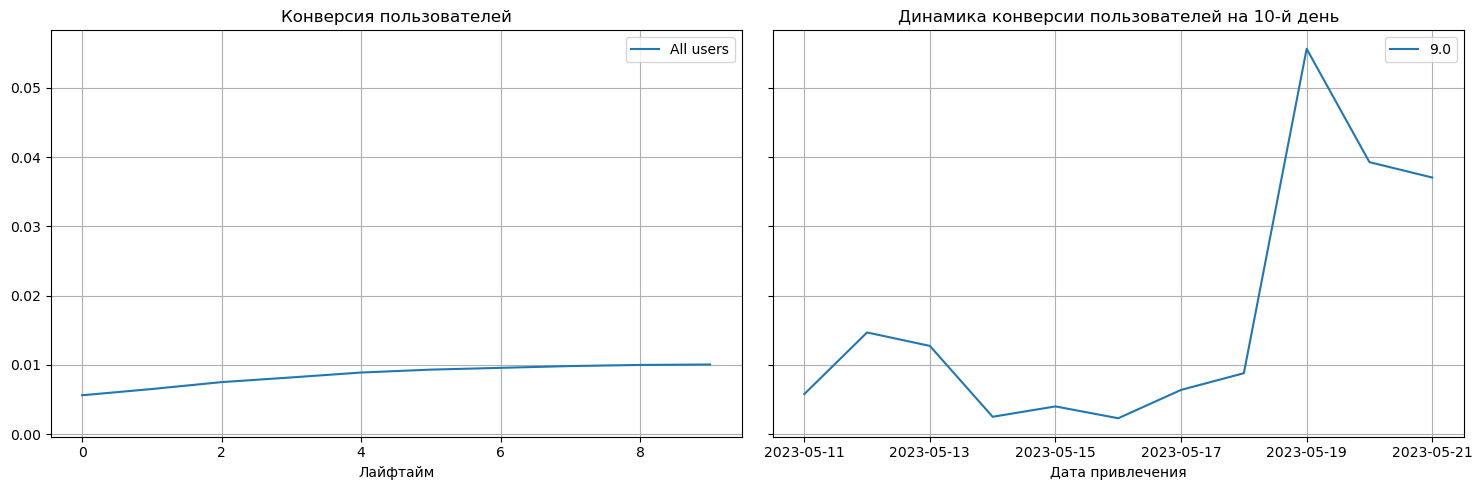

In [60]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, payments, observation_date, horizon_days
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

* Конверсия пользователей с каждым лайфтаймом растет, но очень медленно, на 10-й лайфтайм конверсия чуть больше 1 %;

**Расчитаем и визуализируем LTV:**

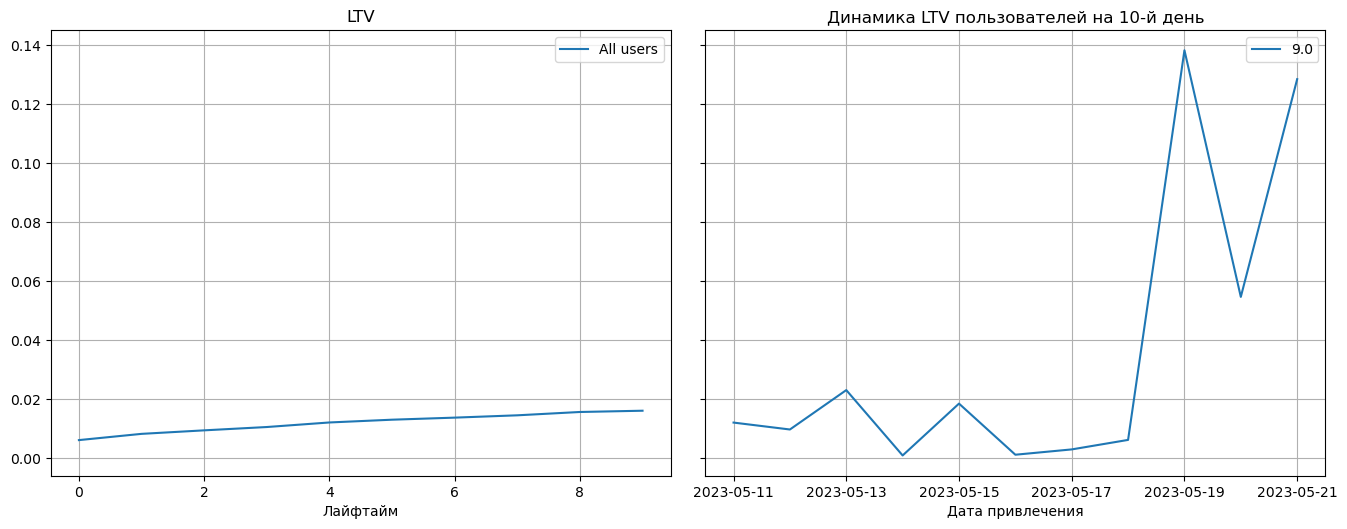

In [61]:
ltv_raw, ltv_grouped, ltv_history = get_ltv(
    profiles, payments, observation_date, horizon_days
)

plot_ltv(
    ltv_grouped, ltv_history, horizon_days, window=1
)

* "Пожизненная ценность"(LTV) пользователей нашего приложения так же с каждым лайфтаймом растет, это хорошо. Но т.к. у нас нет данных о рекламных расходах, мы не можем сказать насколько "это хорошо".

**Комментарий наставника** Отлично и правильно. Мне нравится. что ты расчитал сложыне метрики и что ытиспользовал функции Грфики оч наглядные. Но ты так же мог расчитать более лгкие метрики - среднйи чек, ARPPU (судя по теоретическим вопросам - заказчик в этом заинтересован).

**Посмотрим где ученики совершают больше всего платежей:**

Объединим таблицы `payments` и `users_levels`:

In [62]:
users_levels_pay = users_levels.merge(payments).drop(columns = 'passage_time')
users_levels_pay.head()

,user_id,time,level,pay_time,amt
0,199,2023-05-19 13:35:16.319000,1.0,2023-05-22 20:32:31.620,0.199608
1,199,2023-05-19 13:35:16.319000,1.0,2023-05-25 06:09:40.439,1.503577
2,199,2023-05-19 13:35:16.319000,1.0,2023-05-25 06:30:46.596,1.002050
3,199,2023-05-19 13:38:30.182003,2.0,2023-05-22 20:32:31.620,0.199608
4,199,2023-05-19 13:38:30.182003,2.0,2023-05-25 06:09:40.439,1.503577


Как видим у нас задублировались покупки, т.к. объединение прошло по user_id без учета временного промежутка. Создаим функцию для удаления дубликатов, и применим ее к покупкам каждого пользователя:

In [63]:
def delete_duplicates(df):
    max_level_user = df['level'].max()
    df = df.reset_index().drop(columns = 'index')
    for i in range(len(df)):
        try:
            if ((df['level'][i] != max_level_user)
            and ((df['pay_time'][i] > df.loc[df['level']== df['level'][i]+1]['time'].unique())
            or (df['pay_time'][i] < df['time'][i]))):
                df = df.drop(index = i)
            elif (df['level'][i] == max_level_user) and (df['pay_time'][i] < df['time'][i]):
                df = df.drop(index = i)
            else:
                pass
        except:
            print('Ошибка на индексе:', i)
    return df

In [64]:
users_levels_pay = users_levels_pay[~users_levels_pay['user_id'].isna()]

In [65]:
new_df = pd.DataFrame()
for i in users_levels_pay['user_id'].unique():
    new_df = new_df.append(delete_duplicates(users_levels_pay[users_levels_pay['user_id'] == i]))
new_df = new_df.reset_index().drop(columns = 'index')
new_df.head()

,user_id,time,level,pay_time,amt
0,199,2023-05-22 20:32:04.379003,5.0,2023-05-22 20:32:31.620,0.199608
1,199,2023-05-25 06:05:48.743003,9.0,2023-05-25 06:09:40.439,1.503577
2,199,2023-05-25 06:05:48.743003,9.0,2023-05-25 06:30:46.596,1.002050
3,2586,2023-05-22 05:26:18.212003,6.0,2023-05-22 15:57:31.277,0.199608
4,2586,2023-05-23 21:30:53.399003,9.0,2023-05-27 05:33:25.640,0.400218


In [66]:
print('Количестве покупок по начальным данным:', payments['amt'].count())
print('Количестве покупок по объединенным данным:', new_df['amt'].count())

Количестве покупок по начальным данным: 699
Количестве покупок по объединенным данным: 700


* Нашлась 1 лишняя покупка, найдем и удалим её

In [67]:
new_df[new_df['pay_time'].duplicated()]

,user_id,time,level,pay_time,amt
143,243837,2023-05-20 18:51:40.274004,8.0,2023-05-21 07:27:10.925,0.199608


In [68]:
new_df[new_df['user_id']==243837]

,user_id,time,level,pay_time,amt
142,243837,2023-05-20 14:55:38.153000,1.0,2023-05-21 07:27:10.925,0.199608
143,243837,2023-05-20 18:51:40.274004,8.0,2023-05-21 07:27:10.925,0.199608


In [69]:
new_df = new_df.drop(index = 142)

**Построим графики и пострим на каких уровнях пользователи совершают больше покупок как по сумме так и по количеству:**

In [70]:
new_df_group = new_df.groupby('level').agg({'pay_time':'count','amt':'sum'})\
.reset_index().rename(columns={'pay_time': 'count_pay'})

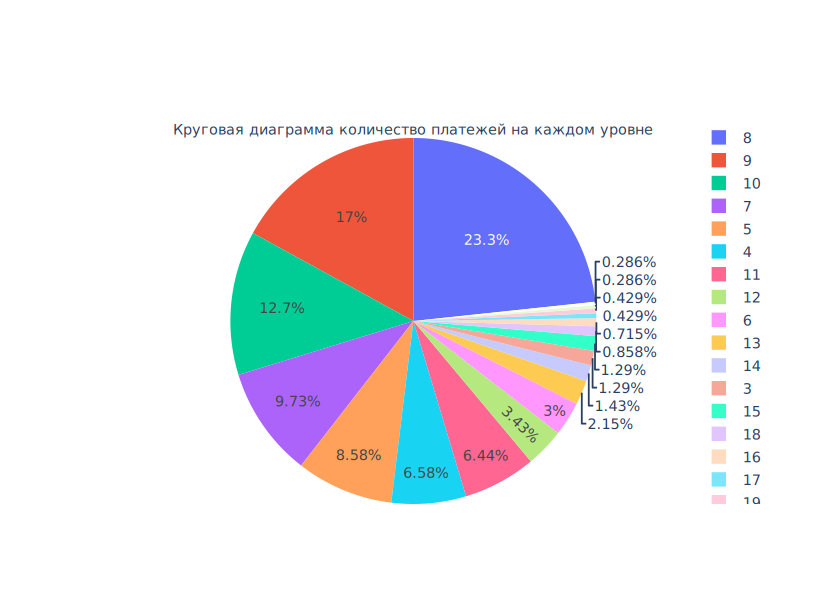

In [71]:
fig = go.Figure(data=[go.Pie(labels=new_df_group['level'], values=new_df_group['count_pay'],\
                             title = 'Круговая диаграмма количество платежей на каждом уровне')])
fig.show()

* Наибольшее количество платежей было совершено пользователями на 8 уровне, 163 платежа это ~ 23 % от всех платежей.
* Наименьшее количество платежей пользователи совершили на 1 и 2 уровнях, всего по 2 платежа ~ четверть процента;

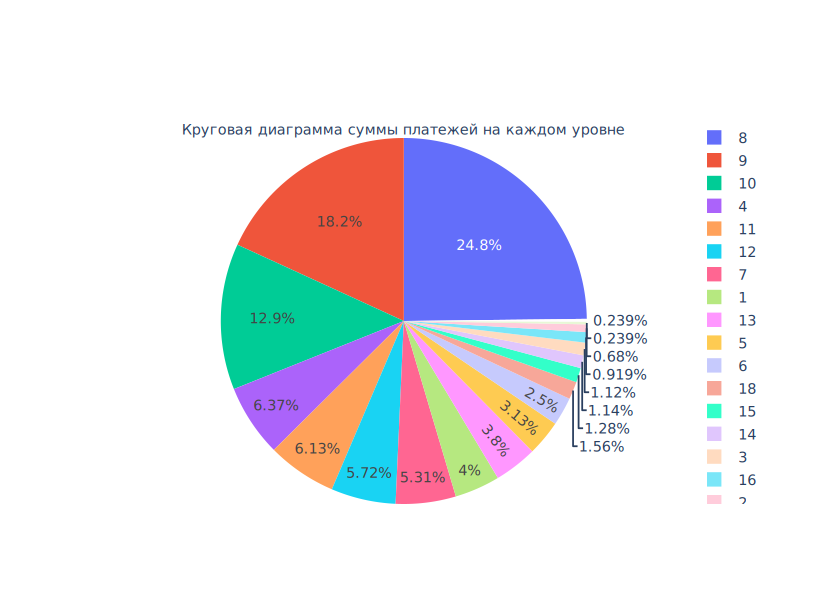

In [72]:
fig = go.Figure(data=[go.Pie(labels=new_df_group['level'], values=new_df_group['amt'],\
                             title = 'Круговая диаграмма суммы платежей на каждом уровне')])
fig.show()

* По сумме платежей первую строчку так же занял 8 уровень ~ 25% от общей суммы;
* А вот аутсайдеры по сумме изменились - 17 и 19 уровни - 1,20 у.е. ~ четверть процента от всей прибыли;

Посмотрим на средний чек:

In [73]:
new_df_group['avg_amt'] = (new_df_group['amt']/new_df_group['count_pay'])

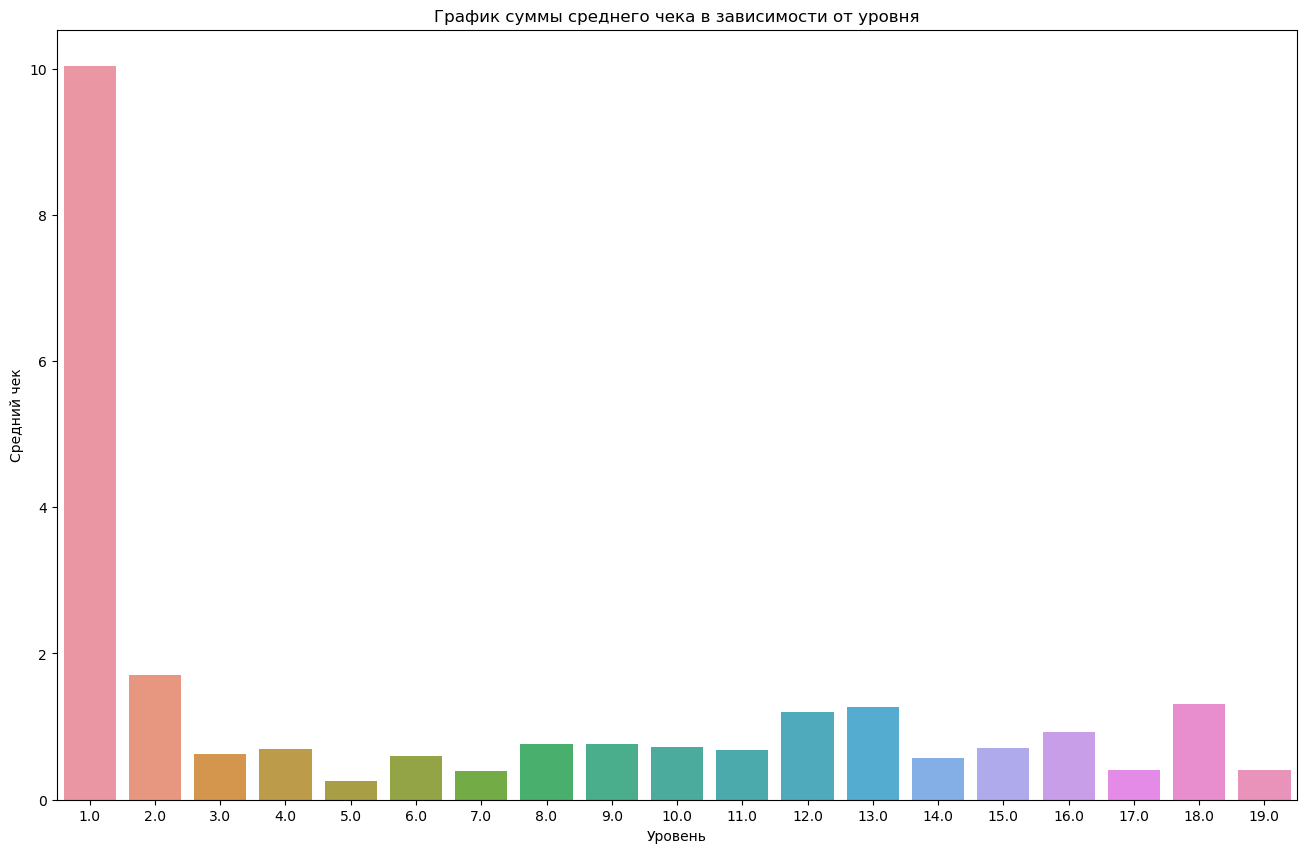

In [74]:
plt.figure(figsize=(16, 10)) # Строим диаграмму для наглядности
(sns.barplot(data = new_df_group, y = 'avg_amt', x= 'level')
    .set(title = 'График суммы среднего чека в зависимости от уровня', \
         xlabel = 'Уровень', ylabel = 'Средний чек'))
plt.show()

* Средний чек распределился иначе, первую строчку занимает 1 уровень ~ 10 у.е. А вот самый маленький средний чек на 5 уровне ~ 0,25 у.е.;

**Посмотрим где ученики совершают первые платежи:**

In [75]:
first_pay = new_df.groupby(['user_id']).agg({'pay_time':'min','level':'first','amt':'first'})\
.reset_index().groupby('level').agg({'amt':'sum','user_id':'nunique'}).reset_index().rename(columns={'user_id': 'count_pay'})

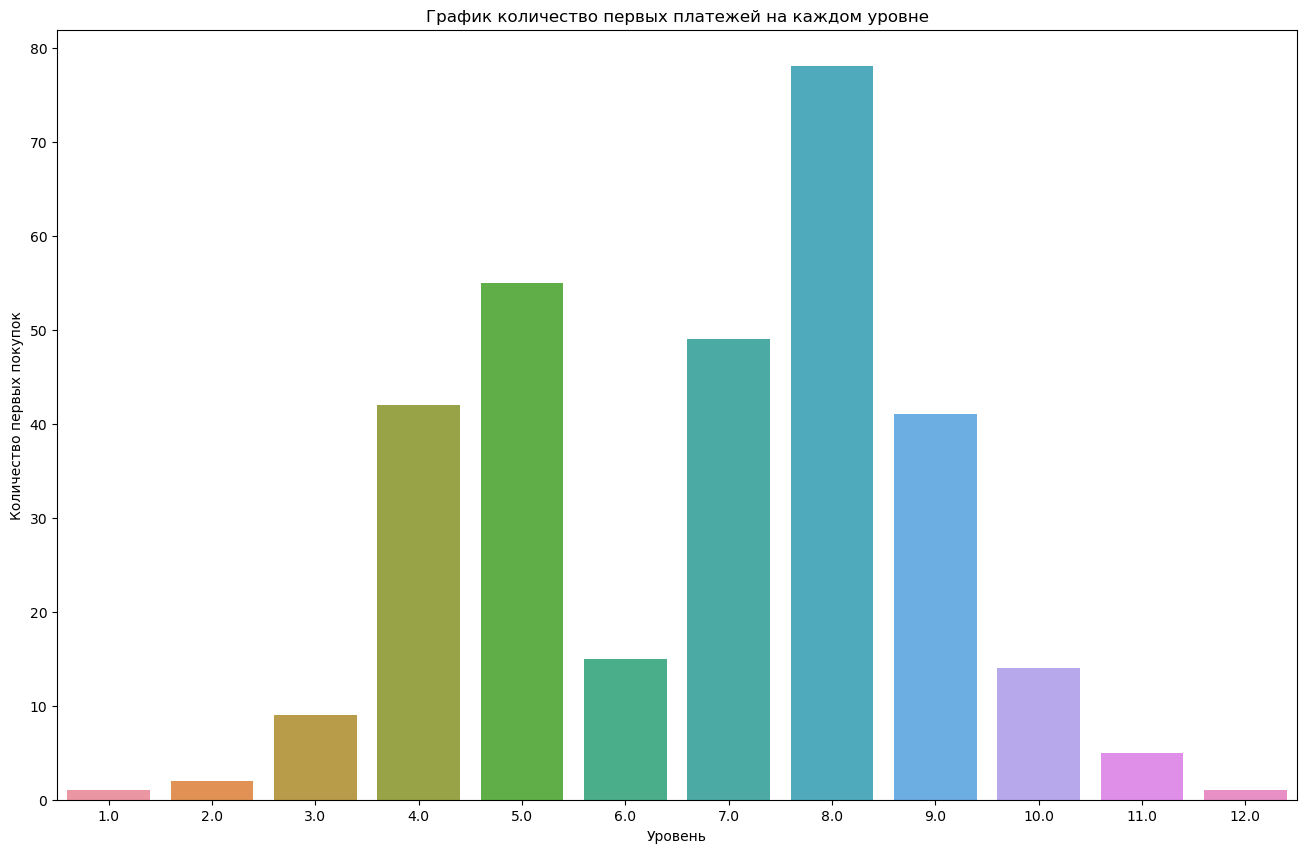

In [76]:
plt.figure(figsize=(16, 10)) # Строим диаграмму для наглядности
(sns.barplot(data = first_pay, y = 'count_pay', x= 'level')
    .set(title = 'График количество первых платежей на каждом уровне', \
         xlabel = 'Уровень', ylabel = 'Количество первых покупок'))
plt.show()

* Большее количество первых платежей происходит на 8 уровне, затем на 5 и 4 соответственно;
* Минимум первых платежей проходит на 1 и 12 уровнях;

**Вывод:**
* Момент анализа данных выбирали - 31.05.2023, т.к. данные о сессиях, покупках и переходжах по уровням у нас до 30.05.2023 включительно;
* Горизонт анализа выбирали 10 дней. Т.к. крайняя дата регистрации пользователей по нашим данным - 21.05.2023, следовательно включая 30.05.2023(крайняя сессия была в данную дату) у нас получается 10 полных лайфтаймов пользователей без пустых значений;
* Удержание платящих пользователей лучше чем неплатящих, что не удивительно;
* 14.05.2023 по всей видимости проходила очень привлекательная промо акция для платящих пользоватлей, т.к. 100% (это подозрительно даже) пользователей привлеченных в данный день, пользовались приложением и на 10 лайфтайм, но платящих пользоватлей не так много, поэтому судить сложно;
* Динамиика удержания не платящих пользователей на 10-й день привлеченных с 14.05 постепенно растет, с небольшим падением 19.05 и 20.05, возможно акция направленная на привлечение пользователей так же повлияла на них;
* Самый длительный по медианному времени прохождения - 11 уровень, больше 2 дней;
* Всех быстрее проходят - 1 уровень, что не удивительно. Время прохождения до 3 минут;
* Конверсия пользователей с каждым лайфтаймом растет, но очень медленно, на 10-й лайфтайм конверсия чуть больше 1 %;
* "Пожизненная ценность"(LTV) пользователей нашего приложения так же с каждым лайфтаймом растет, это хорошо. Но т.к. у нас нет данных о рекламных расходах, мы не можем сказать насколько "это хорошо";
* Наибольшее количество платежей было совершено пользователями на 8 уровне, 163 платежа это ~ 23 % от всех платежей.
* Наименьшее количество платежей пользователи совершили на 1 и 2 уровнях, всего по 2 платежа ~ четверть процента;
* По сумме платежей первую строчку так же занял 8 уровень ~ 25% от общей суммы;
* А вот аутсайдеры по сумме изменились - 17 и 19 уровни - 1,20 у.е. ~ четверть процента от всей прибыли;
* Средний чек распределился иначе, первую строчку занимает 1 уровень ~ 10 у.е. А вот самый маленький средний чек на 5 уровне ~ 0,25 у.е.;
* Большее количество первых платежей происходит на 8 уровне, затем на 5 и 4 соответственно;
* Минимум первых платежей проходит на 1 и 12 уровнях;

### Общий вывод

Мы провели исследование действий пользователей в обучающем приложении. Такие выводы мы получили:

В результате предобработки выявлены и решены следующие проблемы:
* Пропуски и дубликаты в таблицах отсутствуют, что не может не радовать;
* Тип данных столбцов с датой и временем во всех талицах был некорректный - изменили на требуемый;
* Добавили столбец `date` в таблицу `users`;

В результате исследователького анализа данных сделаны следующие выводы:
* Мы распологаем данными о зарезистрированных пользователях за период с 2023-05-11 по 2023-05-21;
* Количество новых пользователей росло с каждым днем до 16.05, потом пошло снижение с небольшим подъемом 20.05, возможно в эти дни проводились рекламмные акции/компании;
* Мы распологаем данными о сессиях пользователей за период с 2023-05-11 по 2023-05-30;
* Мы распологаем данными о покупках пользователей за период с 2023-05-12 по 2023-05-30;
* Мы распологаем данными о переходе пользователей с уровня на следующий за период с 2023-05-11 по 2023-05-30;
* Количество пользователей зарегитрировавшихся в приложении за предоставленный период: 31114 человек;
* Максимальнно достигнутый пользователями уровень, за исследуемый период -  21;
* До 21 уровня добрался всего 1 пользователь из 31 114 человек, это не очень хорошо;
* Самые большие потери пользователей при переходе с 16 на 17 уровень, а именно 70 %. Возможно на 16 уровне задания слишком сложные для аудитории, но это вопрос к разработчикам;
* Всего 312 пользователей совершают покупки, это чуть больше 1% от всех зарегистрированных;
* Сумма дохода за исследуемый период: 501.41 у.е.
* Имеются 4 выброса с платежами 3, 5, 7 и 10 у.е. Оставили без изменений, нам интересны платящите пользователи;
* Основная масса платящих учеников тратит до ~ 3 у.е, но есть и те, кто тратит свыше 50 у.е. Оставили этих пользователей в анализе, т.к. платящих и так чуть больше 1 %;

В результате анализа продуктовых метрик получены следующие выводы:
* Момент анализа данных выбирали - 31.05.2023, т.к. данные о сессиях, покупках и переходжах по уровням у нас до 30.05.2023 включительно;
* Горизонт анализа выбирали 10 дней. Т.к. крайняя дата регистрации пользователей по нашим данным - 21.05.2023, следовательно включая 30.05.2023(крайняя сессия была в данную дату) у нас получается 10 полных лайфтаймов пользователей без пустых значений;
* Удержание платящих пользователей лучше чем неплатящих, что не удивительно;
* 14.05.2023 по всей видимости проходила очень привлекательная промо акция для платящих пользоватлей, т.к. 100% (это подозрительно даже) пользователей привлеченных в данный день, пользовались приложением и на 10 лайфтайм, но платящих пользоватлей не так много, поэтому судить сложно;
* Динамиика удержания не платящих пользователей на 10-й день привлеченных с 14.05 постепенно растет, с небольшим падением 19.05 и 20.05, возможно акция направленная на привлечение пользователей так же повлияла на них;
* Самый длительный по медианному времени прохождения - 11 уровень, больше 2 дней;
* Всех быстрее проходят - 1 уровень, что не удивительно. Время прохождения до 3 минут;
* Конверсия пользователей с каждым лайфтаймом растет, но очень медленно, на 10-й лайфтайм конверсия чуть больше 1 %;
* "Пожизненная ценность"(LTV) пользователей нашего приложения так же с каждым лайфтаймом растет, это хорошо. Но т.к. у нас нет данных о рекламных расходах, мы не можем сказать насколько "это хорошо";
* Наибольшее количество платежей было совершено пользователями на 8 уровне, 163 платежа это ~ 23 % от всех платежей.
* Наименьшее количество платежей пользователи совершили на 1 и 2 уровнях, всего по 2 платежа ~ четверть процента;
* По сумме платежей первую строчку так же занял 8 уровень ~ 25% от общей суммы;
* А вот аутсайдеры по сумме изменились - 17 и 19 уровни - 1,20 у.е. ~ четверть процента от всей прибыли;
* Средний чек распределился иначе, первую строчку занимает 1 уровень ~ 10 у.е. А вот самый маленький средний чек на 5 уровне ~ 0,25 у.е.;
* Большее количество первых платежей происходит на 8 уровне, затем на 5 и 4 соответственно;
* Минимум первых платежей проходит на 1 и 12 уровнях;

**Общие рекомендации**

В первую очеред следует отслеживать метрики:
* Retention Rate - Коэффициент удержания;
* Conversion Rate - Коэффициент конверсии;
* LTV (он же ARPU) - "Пожизненная ценность" клиента;
* ARPPU (LTV только платящих пользователей).

Это позволит своевременно определять имеются ли какие либо проблемы в удержании и конверсии.

Так же следует отслеживать:
* CAC -  стоимость привлечения одного клиента;
* ROI - на сколько процентов «окупились» клиенты;

С помощью данных инструментов мы сможем своевременно подсчитывать доходы/убытки и, исходя из полученного результата, предпринимать какие либо действия.

Для расчета CAC и ROI дополнит ельно необходимо собирать данные о расходах. Так же дополнительно вести журнал действий пользователей, чтобы отслеживать возникающие ошибки, если они будут иметь место.